In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

# Multi Dimensional Arrays
**_Part I_**

As mentioned previously, NumPy can be used to represent arrays of any size and dimension. Though all the examples above have used one-dimensional arrays, all of them will work when we have more than one dimension. For example, a list of lists can be used to initialize a two dimensional array just like a list was used to initialize a one dimensional array. All the array attributes also work similarly.

In [2]:
arr_2d_1 = np.array([[1, 2, 3], [4, 5, 6]])

In [3]:
print(arr_2d_1)

[[1 2 3]
 [4 5 6]]


In [4]:
arr_2d_1.shape

(2, 3)

In [5]:
arr_2d_1.ndim

2

`arr_2d_1` has a dimension of 2 i.e. it has two axes (`0` and `1`, since everything in Python is counted from 0). The **0th axis has 2** elements while the **1st axis has 3** elements.

Most of the functions to generate arrays listed above can be used with more than one dimension, for example

In [6]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [7]:
np.random.randn(2,3)

array([[ 0.18819714, -1.42762107, -0.45728663],
       [ 1.54125806,  1.34756981, -0.63932007]])

Similarly all element wise operations happen similarly on multi-dimensional arrays including binary operations between two arrays.

In [8]:
2*arr_2d_1

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [9]:
arr_2d_2 = np.array([[7, 8, 9], [10, 11, 12]])

In [10]:
arr_2d_1 + arr_2d_2

array([[ 8, 10, 12],
       [14, 16, 18]])

### Indexing and slicing in multi-dimensional arrays

Indexing and slicing for multidimensional arrays work in exactly the same way as in 1D arrays except the indices/slices for each axes are separeted by a `,`. So, if I want to select the element with index 1 along axis 0 and index 2 along axis 1 of the array `arr_2d_1`

In [11]:
arr_2d_1[1,2]

6

We can select all the elements along axis 0 and for the index 2 along axis 1 by

In [12]:
arr_2d_1[:,2].shape

(2,)

Similarly all other slicing operations can be performed on multi-dimensional arrays. We can select all the elements along the 0th axis corresponding to the first index by

In [13]:
arr_2d_1[1]

array([4, 5, 6])

**NOTE:** The above is equivalent to `arr_2d_1[1,:]`. Python reads script from left to right, if we stop putting indices to the right, it is assumed that all elements are selected.

A small illustrated summary of numpy indexing and slicing from [scipylectures.org](https://scipy-lectures.org/intro/numpy/array_object.html): 

<img src="../data/img/np_indexing.png" height=200px width=600px>

### Reading and writing simple arrays

The most efficient way to save array like objects as binary files is the `.npy` file format. To save an array we do `np.save("file_name", array)`. So to save `arr_2d_1`:

In [14]:
np.save("my_array.npy", arr_2d_1)

To read `.npy` files we do `np.load("file_path")`

In [15]:
np.load("my_array.npy")

array([[1, 2, 3],
       [4, 5, 6]])

**NOTE:** `.npy` files are by far the best way to save data of a reasonable size. As data size becomes larger and organization more complex, it is preferable to store data in formats like HDF5. Astronomers have a certain affection towards `.fits` files. We will deal with them in a subsequent tutorial.     
NumPy can also read text files using `np.loadtxt`. Text files are generally used to store catalogs and tabular data. Better methods than NumPy exist to read and work with such data types. They will be discussed in a subsequent tutorial.

## Pretty pictures of galaxies

We will now look at images of galaxies taken by the [Sloan Digital Sky Survey (SDSS)](https://www.sdss.org/). A monochromatic image is basically a 2D array where the brightness of each pixel corresponds to the value of the array element. The supplied data file has images of 15 different galaxies each 64 $\times$ 64 pixels in size. The images were taken in 5 bands of wavelengths (viz. $u$, $g$, $r$, $i$, $z$) ranging from near ultra-violet to mid infrared. We first open the image, read it into an array and check its shape.

In [16]:
data_path = Path("../data/sdss.npy")
imgs = np.load(data_path) 

lets find the shape of the array

In [17]:
imgs.shape # COMPLETE THIS LINE OF CODE

(15, 64, 64, 5)

Looking at the shape try to figure out what each axes of this array corresponds to. We will select some of the galaxies from this set and plot their images. First lets select the second galaxy in the given array (Recall that indexing starts from `0`)

In [18]:
img_1 = imgs[1,:,:,:] # COMPLETE THIS LINE OF CODE
img_1.shape

(64, 64, 5)

We will now plot the image of the selected galaxy by looping over the wavelength bands. Since the pixels span a huge dynamic range we will scale the pixels by performing the element wise hyperbolic tangent peration (`np.tanh()`)

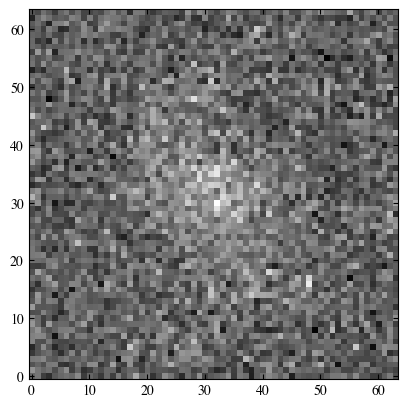

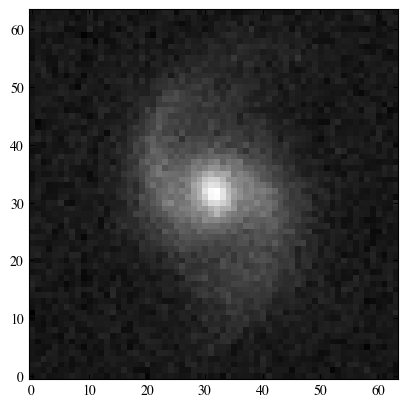

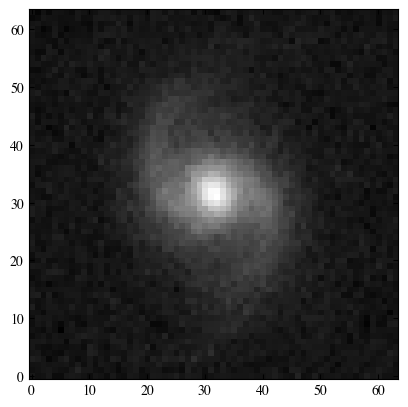

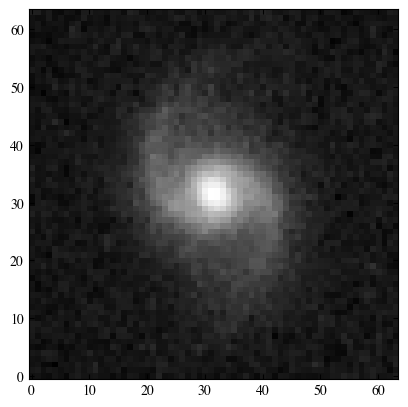

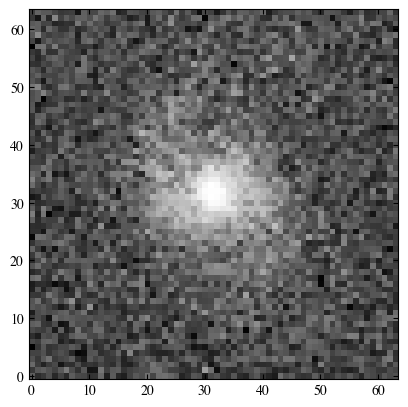

In [19]:
# COMPLETE THESE THREE LINES OF CODE
for i in range(5):                # loop over all the wavelength bands
    selected_filter = img_1[:,:,i]      #Select an image in a wavelength band
    scaled_img = np.tanh(selected_filter)  #scale the image using element wise hyperbolic tan
    
    fig, ax = plt.subplots(1)
    ax.imshow(scaled_img, cmap="gray", origin="lower")

Feel free to select other galaxies and plot their images.  
As you can see the galaxy mostly occupies the central region of the picture. So we will crop the images to select only the central 32$\times$32 array elements for each wavelength band and plot them.

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


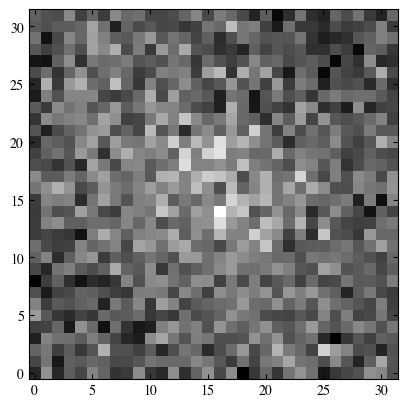

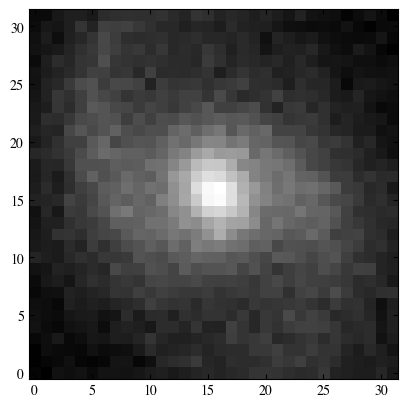

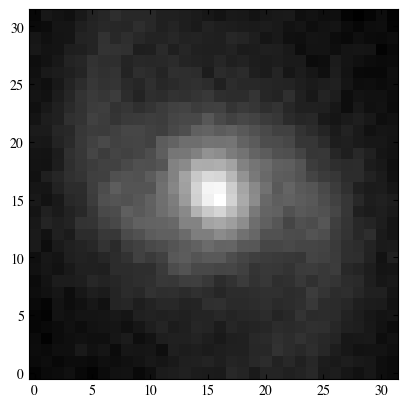

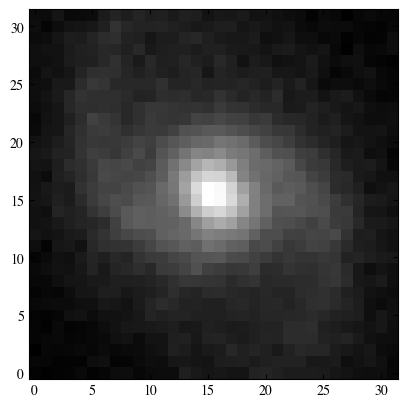

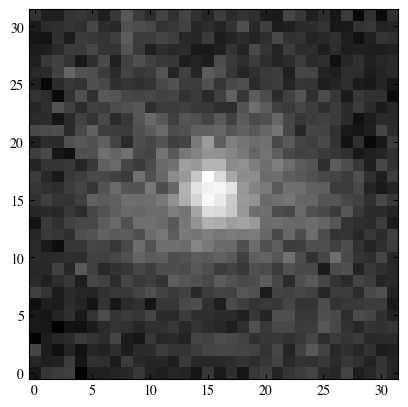

In [20]:
# COMPLETE THESE FOUR LINES OF CODE
for i in range(5): # loop over all the wavelength bands
    selected_filter = img_1[:,:,i]            #Select an image in a wavelength band
    cropped_img = selected_filter[16:-16,16:48]    #Select the central 32x32 elements
    scaled_img =  cropped_img  #scale the image using element wise hyperbolic tan
    
    print(scaled_img.shape)
    fig, ax = plt.subplots(1)
    ax.imshow(scaled_img, cmap="gray", origin="lower")

### Reductions: Numerical operations which return a smaller array

Some numpy functions can take an array as input and return a smaller array as output. An example of such a function would be `np.sum`. If applied on an array, it returns the sum of all elements in the array.

In [21]:
np.sum(arr_2d_1)

21

Such numpy functions also have an argument called `axis`. Alternatively we can specify the axis along which the function will operate. The resulting array will have a dimension less than the original array. The `axis` mentioned in the argument will be the one which is reduced.

In [22]:
arr_2d_1

array([[1, 2, 3],
       [4, 5, 6]])

In [23]:
np.sum(arr_2d_1, axis=0)

array([5, 7, 9])

In [24]:
np.sum(arr_2d_1, axis=1)

array([ 6, 15])

An illustrative representation of `np.sum` across various axes from [scipylectures.org](https://scipy-lectures.org/intro/numpy/operations.html#basic-reductions)

<img src="../data/img/reductions.png" height=200px width=200px>

Most common statistical functions are implemented in NumPy and can be used in a similar way. We will use the function `np.mean()` to calculate the average values of the image pixels across all the wavelength ranges and plot the average image for all the given galaxies in a similar way as before.

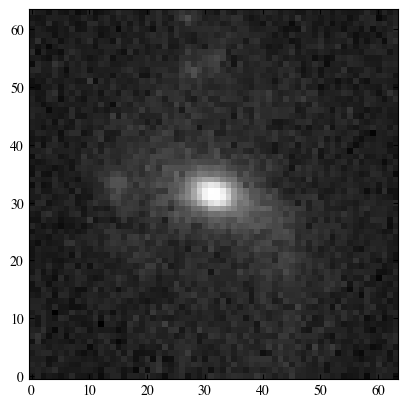

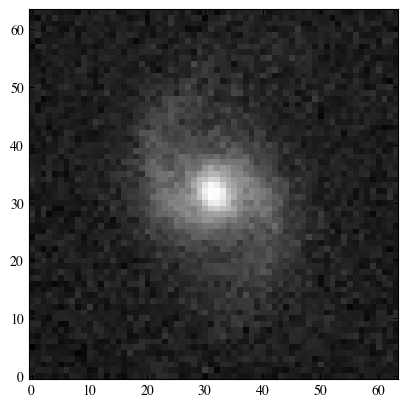

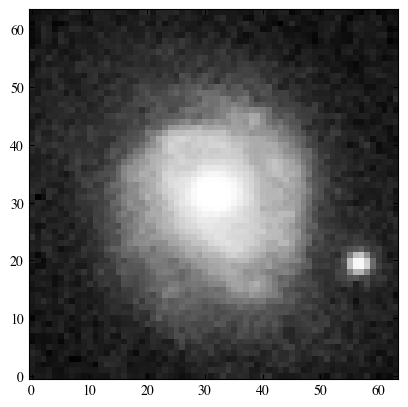

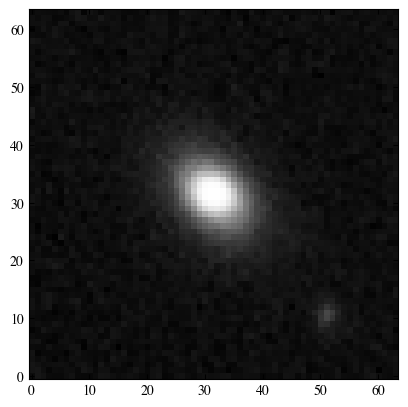

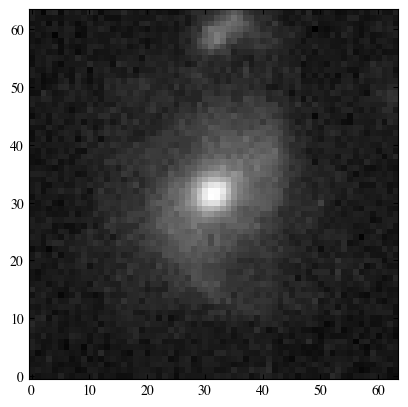

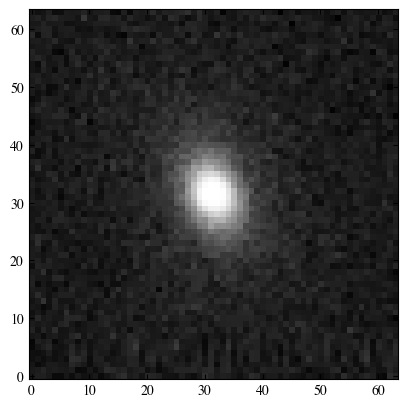

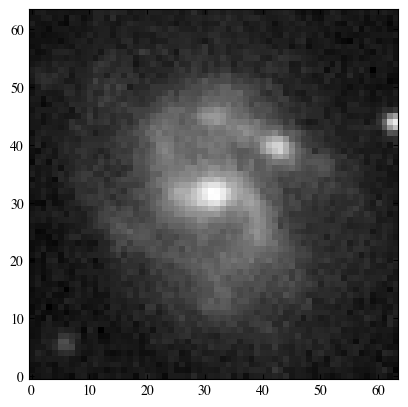

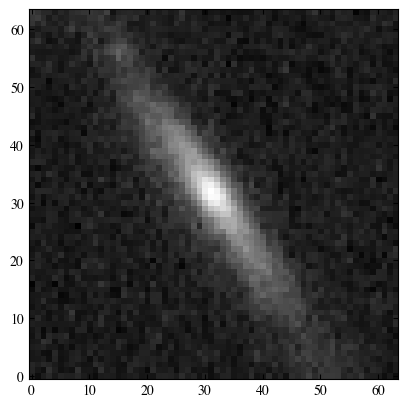

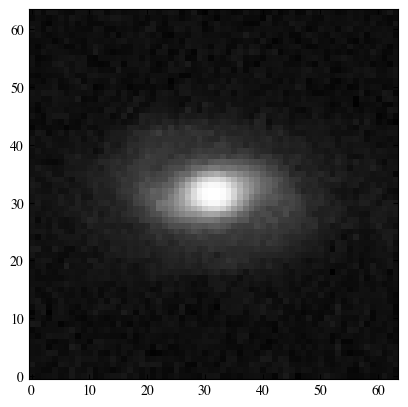

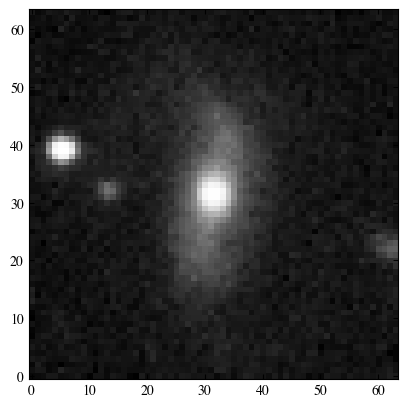

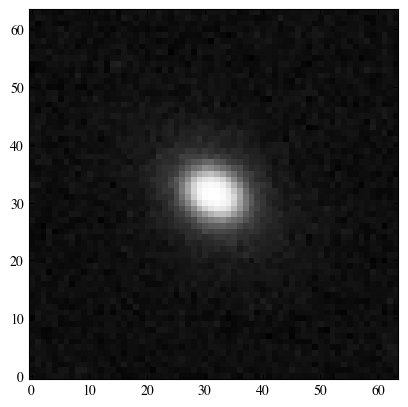

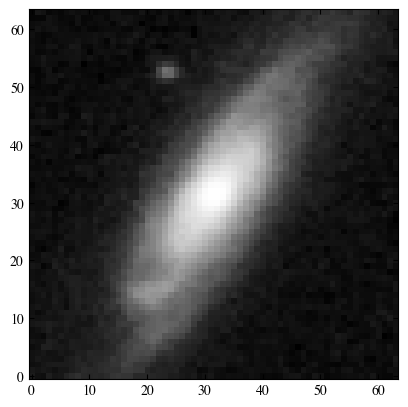

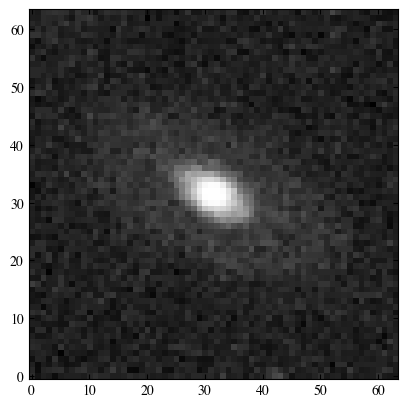

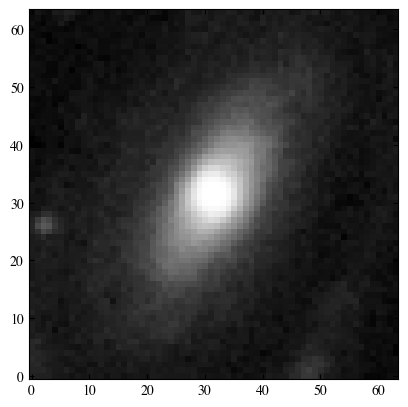

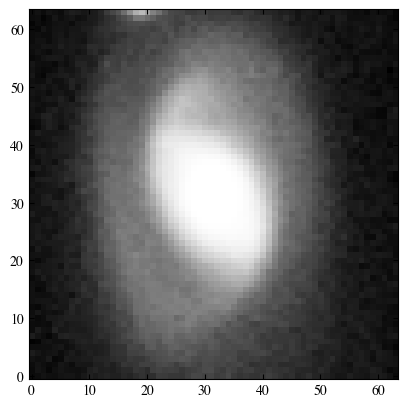

In [25]:
# COMPLETE THESE THREE LINES OF CODE
for i in range(15):                       # loop over all the galaxies in the dataset
    selected_galaxy = imgs[i,:,:,:]            # Select a galaxy from the data set
    mean_img = np.mean(selected_galaxy, axis=-1)                          # Calculate the mean value of all the pixels across observed wavelengths
    scaled_img = np.tanh(mean_img)                      #scale the image using element wise hyperbolic tan
    
    
    fig, ax = plt.subplots(1)
    ax.imshow(scaled_img, cmap="gray", origin="lower")

--------

## Integral field spectroscopy: 3D cubes
**_Part II_**

3D cubes of spatially resolved spectroscopy: 
For each spatial pixel (x,y) on the sky, there is a 1D spectrum.

Let's look at an example galaxy taken from [MANGA](https://www.sdss4.org/dr17/manga/). The following FITS cube is a pared down version of the full cube available from MARVIN (see the entry for [9867-6104](https://dr17.sdss.org/marvin/galaxy/9867-6104/)).

In [26]:
from astropy.io import fits

In [27]:
# Load the cube & wavelength array
ifu_path = Path("../data/manga_cube.fits")
hdu = fits.open(ifu_path)

# z = 0.0302   # Galaxy redshift
wave = hdu['WAVE'].data
flux_cube = hdu['FLUX'].data

hdu.close()

Let's find the shape of the cube:

In [28]:
# Note: the axes are ordered [wavelength, y, x]
flux_cube.shape      # COMPLETE THIS LINE OF CODE

(4563, 54, 54)

To visualize the cube, let's first sum over the spectral/wavelength direction to see the spatial (x,y) distribution:

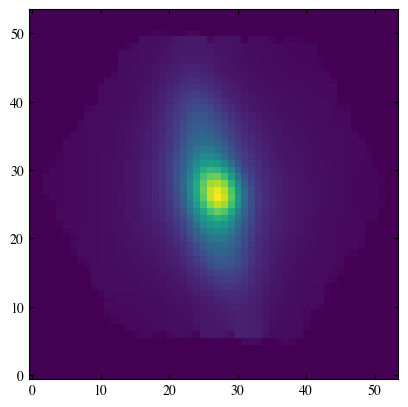

In [29]:
flux_map = np.sum(flux_cube, axis=0)   # COMPLETE THIS LINE OF CODE
fig, ax = plt.subplots(1)
ax.imshow(flux_map, origin="lower")

Now let's examine the 1D spectrum of that pixel (called a "spaxel"):

Text(0.5, 1.0, 'spaxel: [27, 27]')

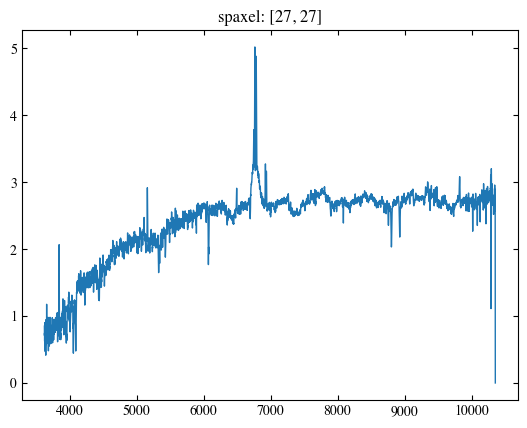

In [30]:
xyc = [27,27]   # Center pixel coordinate

# Reminder: axes order [wavelength, y, x]
spec1d = flux_cube[:,xyc[0], xyc[1]]  # COMPLETE THIS LINE OF CODE
fig, ax = plt.subplots(1)
ax.plot(wave, spec1d) 
ax.set_title('spaxel: {}'.format(xyc))

Let's now plot only a limited wavelength range of this 1D spectrum, zooming in on the H$\alpha$ and [NII] lines:

Text(0.5, 1.0, 'spaxel: [27, 27]')

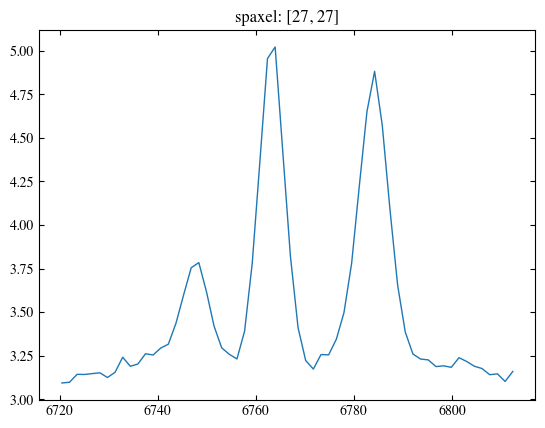

In [31]:
# Limit spectral range to around Halpha + NII
wavelim_indices = [2685, 2745]

# Reminder: axes order [wavelength, y, x]
fig, ax = plt.subplots(1)
ax.plot(wave[wavelim_indices[0]:wavelim_indices[1]], 
         spec1d[wavelim_indices[0]:wavelim_indices[1]])  # COMPLETE THIS LINE OF CODE
ax.set_title('spaxel: {}'.format(xyc))

### Slicing and summing the cube to examine emission line features

Now let's define a more restricted range encompassing just H$\alpha$, and also just the red and blue sides of H$\alpha$. 

Using these ranges, slice the 3D cube to within these wavelength ranges and then sum over that wavelength range to get the spatial distribution of the H$\alpha$ emission, as well as the blueshifted and redshifted sides of the line.

In [32]:
# Limit spectral range to around Halpha
ha_inds = [2711, 2715]
ha_blue_inds = [2711, 2713] 
ha_red_inds = [2713,2715] 

# Reminder: axes order [wavelength, y, x]
flux_map_ha = np.sum(flux_cube[ha_inds[0]:ha_inds[1],:,:], axis=0) # COMPLETE THIS LINE OF CODE
flux_map_ha_blue = np.sum(flux_cube[ha_blue_inds[0]:ha_blue_inds[1],:,:], axis=0) # COMPLETE THIS LINE OF CODE
flux_map_ha_red = np.sum(flux_cube[ha_red_inds[0]:ha_red_inds[1],:,:], axis=0) # COMPLETE THIS LINE OF CODE

Text(0.5, 1.0, 'Whole cube')

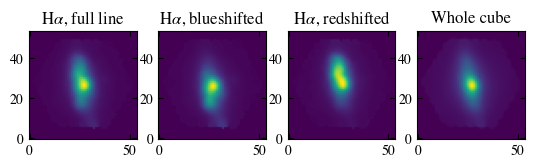

In [33]:
# Plot the Halpha full line, blueshifted, and redshifted maps, 
# and the whole cube collapsed for reference

f, axes = plt.subplots(1,4)

axes[0].imshow(flux_map_ha, origin="lower")
axes[0].set_title(r'H$\alpha$, full line')
axes[1].imshow(flux_map_ha_blue, origin="lower")
axes[1].set_title(r'H$\alpha$, blueshifted')
axes[2].imshow(flux_map_ha_red, origin="lower")
axes[2].set_title(r'H$\alpha$, redshifted')

# Also collapse the flux_cube over the whole wavelength array:
# Reminder: axes order [wavelength, y, x]
axes[3].imshow(np.sum(flux_cube, axis=0), origin="lower") # COMPLETE THIS LINE OF CODE
axes[3].set_title(r'Whole cube')

### Extracting a pseudoslit spectrum

We can also slice and sum the IFU cube to see what a 2D spectrum would look like, if we had observed this galaxy with a slit so there was only spatial information in the y direction and spectral information in the wavelength direction.

We will define a "pseudoslit" that is 10 pixels wide, centered at the middle of the x direction of the cube.

<img src="../data/img/ifu_pseudoslit.png" height=100px width=500px>

In [34]:
npix = 10
slice_l = 22
slice_u = 32

# Crop the cube to include only the x pixels within this pseudoslit:
# Reminder: axes order [wavelength, y, x]
cube_crop = flux_cube[:, :, slice_l:slice_u]   # COMPLETE THIS LINE OF CODE

print("Cropped cube shape:", cube_crop.shape)

Cropped cube shape: (4563, 54, 10)


Now sum over the x direction, as slit spectroscopy effectively combines all the spatial information within one "row" of pixels in a slit.

In [35]:
# Reminder: axes order [wavelength, y, x]
flux_pseudoslit = np.sum(cube_crop, axis=2)  # COMPLETE THIS LINE OF CODE

In [36]:
# For plotting the 2D spectra, we'd like to have the 
# wavelength in the x direction as columns, so we will transpose this 2D array:

# Shape before the transformation:
print("Before shape:", flux_pseudoslit.shape)

flux_pseudoslit = flux_pseudoslit.T

# Shape after the transformation:
print("After shape:", flux_pseudoslit.shape)

Before shape: (4563, 54)
After shape: (54, 4563)


Now let's plot our 2D pseudoslit spectrum:

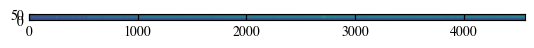

In [37]:
fig, ax = plt.subplots(1)
ax.imshow(flux_pseudoslit, origin="lower")

Unsurprisingly, it's hard to see features with the full wavelength range. Let's slice the 2D spectrum array to just highlight H$\alpha$ and [NII] again.

Text(0, 0.5, 'y')

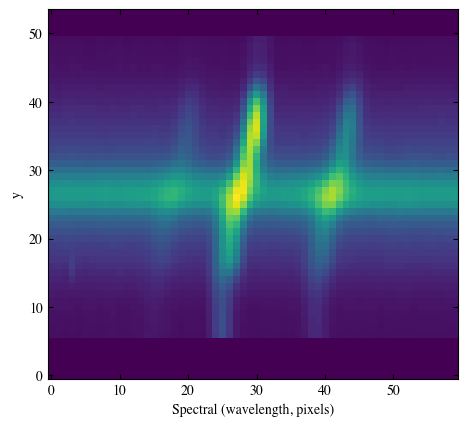

In [38]:
# Limit spectral range to around Halpha + NII
wavelim_indices = [2685, 2745]

# Now that we've transposed the array, the axes order is [y, wavelength]
fig, ax = plt.subplots(1)
ax.imshow(flux_pseudoslit[:,wavelim_indices[0]:wavelim_indices[1]], origin='lower')  # COMPLETE THIS LINE OF CODE
ax.set_xlabel('Spectral (wavelength, pixels)')
ax.set_ylabel('y')

Here we can see, from left to right, the [NII]6548$\unicode{x212B}$, H$\alpha$6564$\unicode{x212B}$, and [NII]6584$\unicode{x212B}$ emission lines, on top of continuum emission from the central region of the galaxy. 

The emission lines exhibit "curves" showing the velocity signature across the galaxy. 

The lower part of the galaxy (lower part of the y axis here) has blueshifted emission, while the upper part has redshifted emission. 

This agrees with what we saw when we plotted fluxmaps created from summed slices of the blue- and redshifted sides of H$\alpha$!

--------

### Transposing multi-D arrays

Above we used a shorthand available to `numpy` `ndarrays` (`flux_pseudoslit.T`, or alternatively `flux_pseudoslit.transpose()`) to transpose the 2D pseudoslit array. 

As this is a 2D array, it exchanged the order of the 2 axes by default, without passing an axes permuation order. 

However, for higher dimension arrays, `np.transpose()` takes a keyword argument `axes` which is a list or tuple of the order in which to permute the array's axes.

For reference:

In [39]:
np.transpose?

Signature: np.transpose(a, axes=None)
Docstring:
Returns an array with axes transposed.

For a 1-D array, this returns an unchanged view of the original array, as a
transposed vector is simply the same vector.
To convert a 1-D array into a 2-D column vector, an additional dimension
must be added, e.g., ``np.atleast2d(a).T`` achieves this, as does
``a[:, np.newaxis]``.
For a 2-D array, this is the standard matrix transpose.
For an n-D array, if axes are given, their order indicates how the
axes are permuted (see Examples). If axes are not provided, then
``transpose(a).shape == a.shape[::-1]``.

Parameters
----------
a : array_like
    Input array.
axes : tuple or list of ints, optional
    If specified, it must be a tuple or list which contains a permutation
    of [0,1,...,N-1] where N is the number of axes of `a`. The `i`'th axis
    of the returned array will correspond to the axis numbered ``axes[i]``
    of the input. If not specified, defaults to ``range(a.ndim)[::-1]``,
    which

Let's look at using `np.transpose()` to permute the axes of our 3D IFU cube:

In [40]:
# Original cube shape: 
flux_cube.shape

# Reminder: axes order [wavelength, y, x]

(4563, 54, 54)

Now let's permute the axes so the spectral/wavelength dimension is last, without modifying the order of the y and x axes:

In [41]:
flux_cube_transp = np.transpose(flux_cube, axes=[1,2,0]) # COMPLETE THIS LINE OF CODE

In [42]:
flux_cube_transp.shape

(54, 54, 4563)

To convince ourselves we've done the transposition as expected, let's collapse both the original cube and this transposed cube over their respecive wavelength arrays across just the the Halpha line indices (as the data asymmetry makes it easier to see transposition results!):

Text(0.5, 1.0, 'Cube, transp')

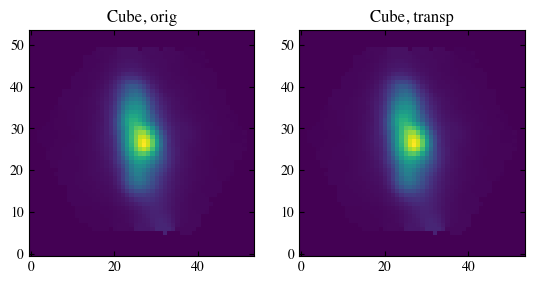

In [43]:
ha_inds = [2711, 2715]

f, axes = plt.subplots(1,2)

axes[0].imshow(np.sum(flux_cube[ha_inds[0]:ha_inds[1],:,:],axis=0), origin='lower') # COMPLETE THIS LINE OF CODE
axes[0].set_title('Cube, orig')
axes[1].imshow(np.sum(flux_cube_transp[:,:,ha_inds[0]:ha_inds[1]],axis=2), origin='lower') # COMPLETE THIS LINE OF CODE
axes[1].set_title('Cube, transp')

These look exactly the same, as we would expect!

Now let's permute the flux cube again, this time inverting the axes order entirely to be `[x, y, wavelength]` (where it originally was `[wavelength, y, x]`):

In [44]:
flux_cube_transp2 = np.transpose(flux_cube, axes=[2,1,0]) # COMPLETE THIS LINE OF CODE

In [45]:
flux_cube_transp2.shape

(54, 54, 4563)

Text(0.5, 1.0, 'Cube, transp 2')

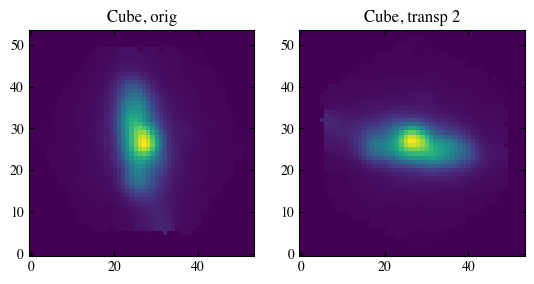

In [46]:
ha_inds = [2711, 2715]

f, axes = plt.subplots(1,2)

axes[0].imshow(np.sum(flux_cube[ha_inds[0]:ha_inds[1],:,:],axis=0), origin='lower') # COMPLETE THIS LINE OF CODE
axes[0].set_title('Cube, orig')
axes[1].imshow(np.sum(flux_cube_transp2[:,:,ha_inds[0]:ha_inds[1]],axis=2), origin='lower') # COMPLETE THIS LINE OF CODE
axes[1].set_title('Cube, transp 2')

While our wavelength axis is the same as the above transposed cube, this new cube also exhibits a transposition in the x-y plane!

--------------
Want to see more (and prettier) pictures of galaxies?  
Check out [legacysurvey.org](http://legacysurvey.org/viewer)!